# Part 1: Small world networks

* What's the problem with random networks as a model for real-world networks according to the argument on p. 11-12?

The problem is that random networks average degree is close to the degree in most nodes.
This is not the case for nodes in reals networks. <br>
This is because the degree distribution on real network for nodes does not follow a porsson distribution. 

For the random network hubs ie nodes with high degree does not accure. But this is observed to be more likely in real networks

 * List the four regimes that characterize random networks as a function of  ⟨k⟩



In [1]:
# Subcritical regime 0 < k > 1

# Critical regime k = 1

# Supercritical regime k > 1

# Connected regime k > ln(n)

* According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering  C(k)  decreases as a function of  kk  in real-world networks?

For realworld networks it is not likly that every link has the same probability. This can be caused by many variable according to the network being observed.

An example would be that there is a higher chance for a person to know someone from their local community then the propability of them knowing an person picked at random in the world.

### Exercises_: WS edition.


> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.

In [2]:
import numpy as np
import random
import networkx as nx

def average_shortest_path_length_d(graph):
    #print("Average shortest path length")
    d = nx.average_shortest_path_length(graph)
    #print("d", d)
    return d

n = 500
k = 4
p_list = [0,0.1,1] 

for p in p_list:
    graph = nx.watts_strogatz_graph(n,k,p)
    d = average_shortest_path_length_d(graph)
    print(d)
# The average shortest path becomes very close to the average degree 

62.875751503
7.52056112224
4.77850901804


> * Play around with $p$. What's the value of $p$ for which the average shortest path length gets close to the fully randomized network (i.e. when $p = 1$).


In [3]:
# Random network with prob 1
random_network = nx.gnp_random_graph(n, p=1)
random_d = average_shortest_path_length_d(random_network)
print(random_d)


1.0


In [4]:
import math
import numpy as np


def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    print(idx)
    return array[idx]



value_list = list()
p_value_list = list()
for p in np.arange(0, 1, 0.1):
    graph = nx.watts_strogatz_graph(n,k,p)

    value_list.append( average_shortest_path_length_d(graph))
    p_value_list.append(p)
    print("p",p)

value_array = np.asarray(value_list)
find_nearest(value_array,random_d)

('p', 0.0)
('p', 0.10000000000000001)
('p', 0.20000000000000001)
('p', 0.30000000000000004)
('p', 0.40000000000000002)
('p', 0.5)
('p', 0.60000000000000009)
('p', 0.70000000000000007)
('p', 0.80000000000000004)
('p', 0.90000000000000002)
9


4.7365931863727457

In [5]:
graph = nx.watts_strogatz_graph(n,k,1)


value_list = list()
p_value_list = list()
for p in np.arange(0, 0.1, 0.001):
    try:
        random_network = nx.gnp_random_graph(n,p)
        d = average_shortest_path_length_d(random_network)
        print d , p
    except:
        print("not connected" , p)
# p = 0.012, d= 3.70 closest

('not connected', 0.0)
('not connected', 0.001)
('not connected', 0.002)
('not connected', 0.0030000000000000001)
('not connected', 0.0040000000000000001)
('not connected', 0.0050000000000000001)
('not connected', 0.0060000000000000001)
('not connected', 0.0070000000000000001)
('not connected', 0.0080000000000000002)
('not connected', 0.0090000000000000011)
('not connected', 0.01)
3.90586773547 0.011
('not connected', 0.012)
3.58098597194 0.013
3.36606012024 0.014
3.33818036072 0.015
3.22387174349 0.016
3.13858917836 0.017
3.07061322645 0.018
2.99860521042 0.019
2.99438076152 0.02
2.945498998 0.021
2.822749499 0.022
2.77401202405 0.023
2.74983567134 0.024
2.75777154309 0.025
2.67184769539 0.026
2.67777154309 0.027
2.6553507014 0.028
2.63206412826 0.029
2.58341482966 0.03
2.57733867735 0.031
2.54111422846 0.032
2.53031663327 0.033
2.4953747495 0.034
2.501498998 0.035
2.45709018036 0.036
2.43925450902 0.037
2.42004809619 0.038
2.40662124248 0.039
2.39883767535 0.04
2.36080160321 0.041
2.

> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](http://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html "Link: http://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html") to the plot. My version of the plot is below (since a picture's worth 1000 words).
> 

In [6]:
def generate_networks(number_of_times, n, k, p_list):
    list_mean = list()
    list_std = list()
    for p in p_list:
        list_average_d = list()
        for number in range(number_of_times):     
            graph = nx.watts_strogatz_graph(n,k,p)
            d = average_shortest_path_length_d(graph)
            list_average_d.append(d)
            
        mean = np.mean(list_average_d)
        std = np.std(list_average_d)
        list_mean.append(mean)
        list_std.append(std)
    return list_mean, list_std
          
    

n = 500
k = 4
p_list = [0,0.01,0.03,0.04,0.1,0.2]

list_mean,list_std = generate_networks(50, n, k, p_list)

<Container object of 3 artists>

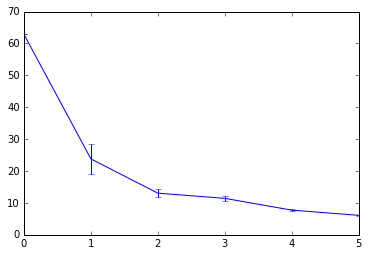

In [7]:
import matplotlib.pyplot as plt
% matplotlib inline
x = np.arange(len(list_mean))
plt.errorbar(x, list_mean,  yerr=list_std)


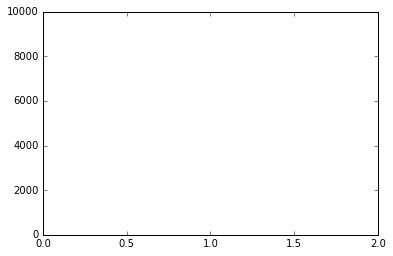

In [8]:
%matplotlib inline
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
@interact
def foo(first_term = [-20,20]):
    
    ## first_term = n - y + 1
    x = np.linspace(-10,10,100)
    y = x ** first_term

    plt.plot(x,y)
    plt.ylim([0,10000])
    plt.xlim([0,2])
    plt.show()

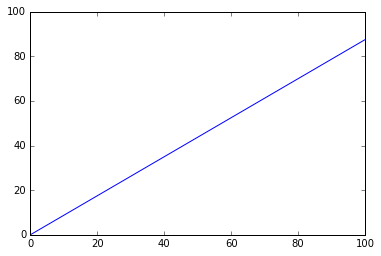

In [9]:
import math
@interact
def ultra_small(n = [2,20]):
    
    ## first_term = n - y + 1
    x = np.linspace(-10,100,100)
    y = np.multiply(x, math.log(math.log(n)))  

    plt.plot(x,y)
    plt.ylim([0,100])
    plt.xlim([0,100])
    plt.show()


 * What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 5.7 to answer this one).
 
 

* Anomalous Regime <br>
 y < 2, this means the exponent in kmax = kmin N exp( 1/(y-1) ) <br>
 
 1 /( y - 1 ) > 1
 
 This means that the number links in the largest hub will increase faster then N. In the case that it is not possible to have multi-links, a large scale free network does not make sense for y < 2


* Scale-free Regime

The average distance grows slower in proportion to N compared to a random network. In this regime small hubs starts to accure linking together larger number of nodes. Effectivly reducing the average distance between two random nodes. The power law degree distributions is getting a tail where there is a higher probability for high degree k, compared to the random network



* Random Network Regime

Kmax becomes small for high number of links. because the exponent becomes smaller as y increases above 3.
This results in low probability for hubs to accure. 

The slope is dependent on the degree expontent y. For this regime it is difficult to distinguish it from a random network


* What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.

## We're going to create our own Barabasi-Albert model (a special case) in right in a notebook. Follow the recipe below for success

> We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success
> 
> * First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
> * Now add another node, connecting one of the existing nodes in proportion to their degree.
> * Keep going until you have a 100 node network.
>   * _Hint_: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using `random.choice`) corresponds to selecting a node with probability proportional to it's degree.
> * Plot the network. 

> ![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2016/master/files/ba.png)
> 

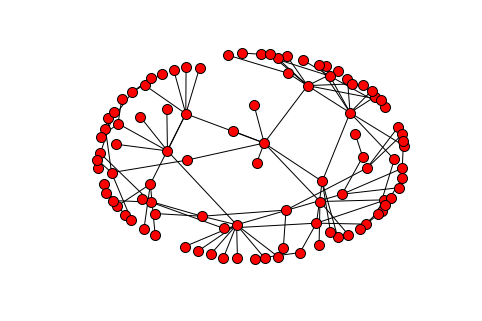

In [10]:
import networkx as nx
import random

def draw_from_degree_propability(graph):
    edges = np.asarray(graph.edges())
    flat_edges = np.ndarray.flatten(edges)
    return random.choice(flat_edges)



graph = nx.Graph()


graph.add_nodes_from([1,2])
graph.add_edge(1,2)

for node in range(3,101):
    existing_node = draw_from_degree_propability(graph)
    graph.add_edge(existing_node, node)
    

nx.draw_spring(graph,node_size = 100)

> * Add more nodes until you have a 5000 node network.



In [11]:
while len(graph.nodes()) < 5000:
    node = len(graph.nodes()) + 1
    existing_node = draw_from_degree_propability(graph)
    graph.add_edge(existing_node, node)

> * What's the maximum and minimum degree?

In [12]:
import operator

maximum_degree = max(nx.degree(graph).iteritems(), key=operator.itemgetter(1))[1]
minimum_degree = min(nx.degree(graph).iteritems(), key=operator.itemgetter(1))[1]

# Max and min
print(maximum_degree, minimum_degree)

(82, 1)


> * Now, bin the degree distribution using `numpy.histogram`.
> * Plot the distribution. Plot it with both linear and log-log axes.
> 

In [13]:
def create_histogram_from_graph(graph):
    
    min_value = np.min(nx.degree(graph).values())
    max_value = np.max(nx.degree(graph).values())

    bin_vector = [i for i in range(min_value,max_value) ]
    hist, bin_edges = np.histogram(nx.degree(graph).values(), bins = bin_vector)
    
    return hist

hist = create_histogram_from_graph(graph)


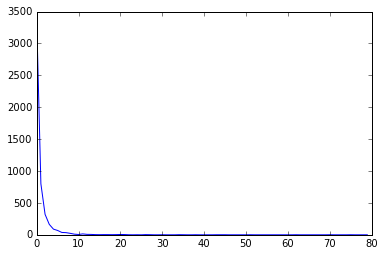

In [14]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.plot(hist)

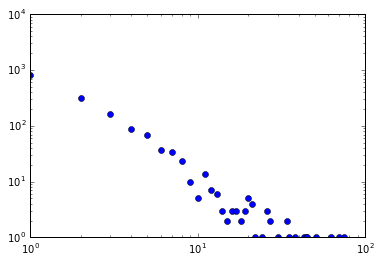

In [15]:
plt.loglog(hist,marker='o',linestyle='none')

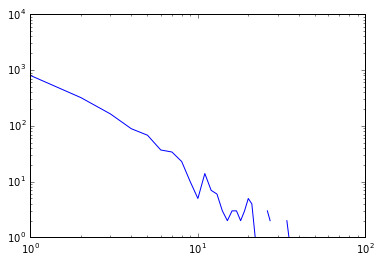

In [16]:
plt.loglog(hist)

> Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average\*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

> 
> * Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
> * Find $i$'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
> * Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.
> * Do this 1000 times. How many out of those 1000 times is the friendship paradox true?
> 


In [17]:
def calculate_average_neighbor_degree(graph, neighbor_nodes):
    list_neightbor_degrees = list()
    for neighbor_node in neighbor_nodes:
        degree = graph.degree(neighbor_node)
        list_neightbor_degrees.append(degree)

    mean = np.mean(list_neightbor_degrees)    
    return mean

def compare_random_degree_to_neighbor_degree(graph):
    random_node = random.choice(graph.nodes())
    random_node_degree = graph.degree(random_node)
    neighbor_nodes = graph.neighbors(random_node)
    average_neighbor_degree = calculate_average_neighbor_degree(graph,neighbor_nodes)
    
    return random_node_degree < average_neighbor_degree

result_list = list()
for number in range(1000):
    result_list.append(compare_random_degree_to_neighbor_degree(graph))

In [18]:
times_friendship_paradox_is_true = sum(result_list)
times_friendship_paradox_is_true

869

> Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 
> 
> * Compare to the ER network of same size and same _p_. What are the differences? Explain in your own words. _Hint_: To get started, take a look at the degree distribution, and study the number of connected components.
>

In [57]:
# Build ER network with same size and p

er_graph = nx.erdos_renyi_graph(5000,1.0/5000)
len(er_graph.edges())

2517

In [58]:
def create_histogram_from_graph(graph):
    
    min_value = np.min(nx.degree(graph).values())
    max_value = np.max(nx.degree(graph).values())

    bin_vector = [i for i in range(min_value,max_value) ]
    print(min_value,max_value)
    hist, bin_edges = np.histogram(nx.degree(graph).values(), bins = bin_vector)
    
    return hist
    
def create_bar_from_hist(hist,title):
    index = np.arange(len(hist))
    plt.title(title)
    plt.ylabel("Number of nodes")
    plt.xlabel("Node degree")
    plt.bar(index,hist)


(0, 6)


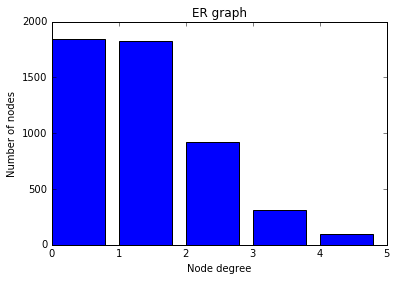

In [60]:
hist = create_histogram_from_graph(er_graph)
create_bar_from_hist(hist,"ER graph")

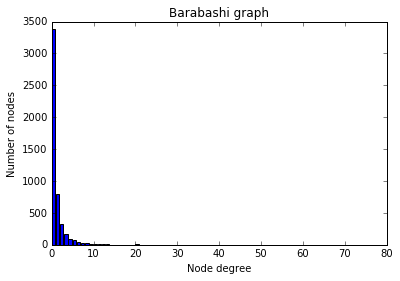

In [37]:
hist = create_histogram_from_graph(graph)
create_bar_from_hist(hist,"Barabashi graph")

In [38]:
ba_graph = nx.barabasi_albert_graph(5000,1)

In [39]:
len(ba_graph.edges())

4999